In [24]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(111)
    orig = ax.plot(timeseries, color='blue',label='Original')
    mean = ax.plot(rolmean, color='red', label='Rolling Mean')
    std = ax.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput, dftest

# Testing

In [33]:
b08 = pd.read_csv('../data/b08c2.csv')
b08_viento = b08["viento"]#.as_matrix()

train_per = 0.6
data_len = b08_viento.shape[0]
data = b08_viento[:int(data_len*train_per)]
test = b08_viento[int(data_len*train_per):]

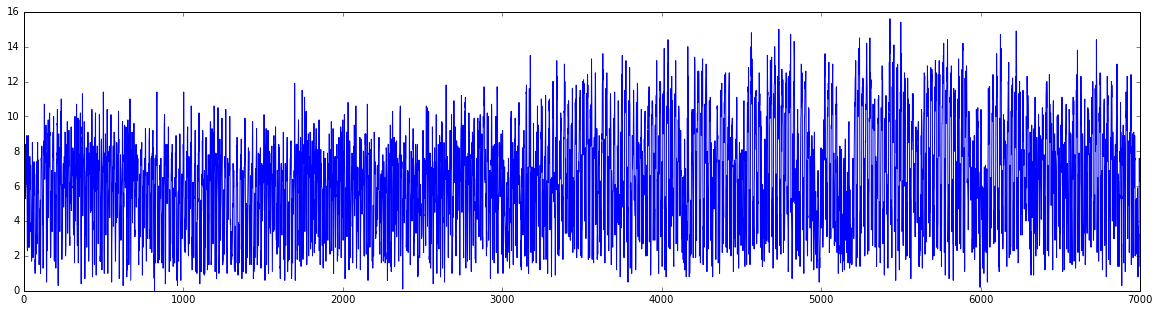

/home/tronco/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/tronco/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


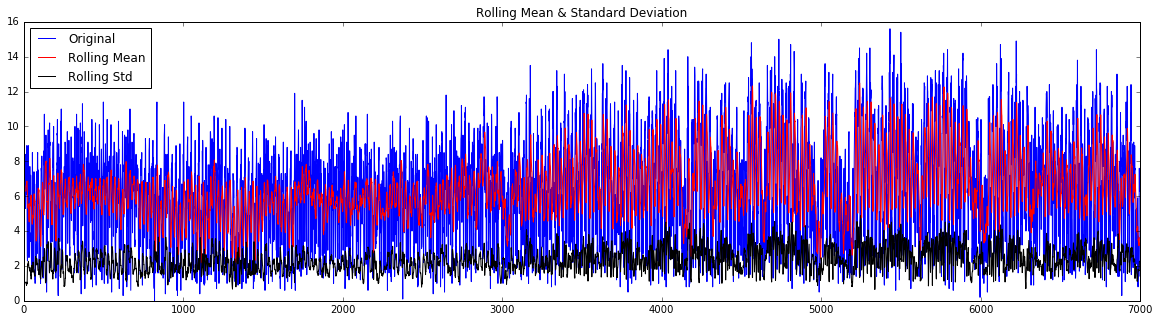

Results of Dickey-Fuller Test:
Test Statistic                -7.298805e+00
p-value                        1.355618e-10
#Lags Used                     2.600000e+01
Number of Observations Used    6.971000e+03
Critical Value (5%)           -2.861955e+00
Critical Value (1%)           -3.431288e+00
Critical Value (10%)          -2.566991e+00
dtype: float64 (-7.2988047774699556, 1.3556181860515029e-10, 26, 6971, {'5%': -2.8619547049486962, '1%': -3.4312884176747231, '10%': -2.5669907435023811}, 26183.47658596118)


In [85]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(data)
plt.show()
test_stationarity(data)

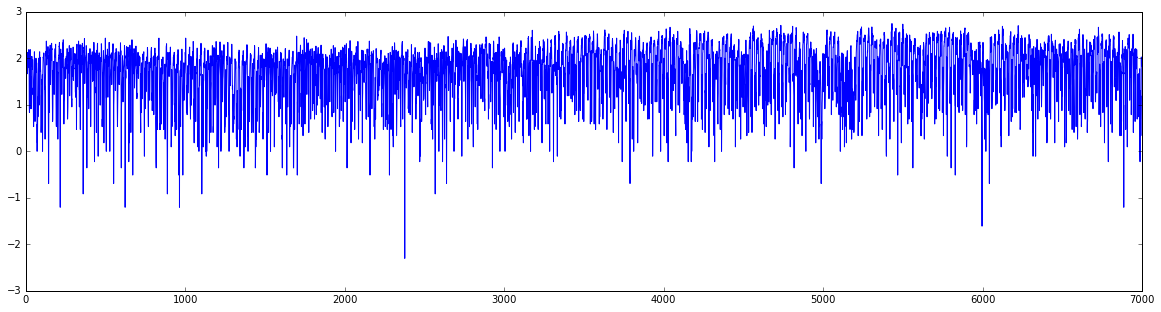

In [56]:
data_log = np.log(data)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(data_log)
plt.show()

In [57]:
from statsmodels.tsa.arima_model import ARIMA

In [87]:
model = ARIMA(data.as_matrix(),(2,1,2))
result = model.fit()

/home/tronco/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
